### Carregando bibliotecas

In [73]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import r2_score

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats

### Carregando dataset

In [74]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


### Análises básicas

In [75]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### Separando o dataset de treino do de teste

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


### Iniciando a regressão

Text(0.5, 1.0, 'Preços originais vs Preços preditos:')

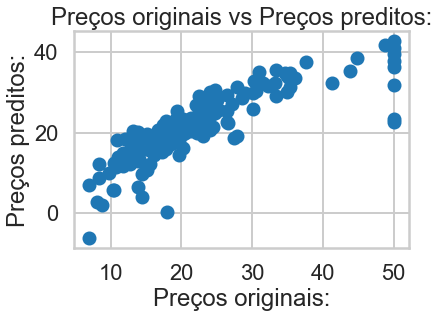

In [78]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Preços originais:")
plt.ylabel("Preços preditos:")
plt.title("Preços originais vs Preços preditos:")

In [79]:
diff = pd.DataFrame({'Original': Y_test, 'Predito': Y_pred})
diff1 = diff.head(20)
print(diff.head(15))

     Original    Predito
226      37.6  37.467236
292      27.9  31.391547
90       22.6  27.120196
373      13.8   6.468433
273      35.2  33.629667
417      10.4   5.670680
503      23.9  27.039467
234      29.0  29.927047
111      22.8  26.356613
472      23.2  22.452460
99       33.2  32.205044
339      19.0  21.786417
309      20.3  23.411384
304      36.1  33.608944
272      24.4  28.286195


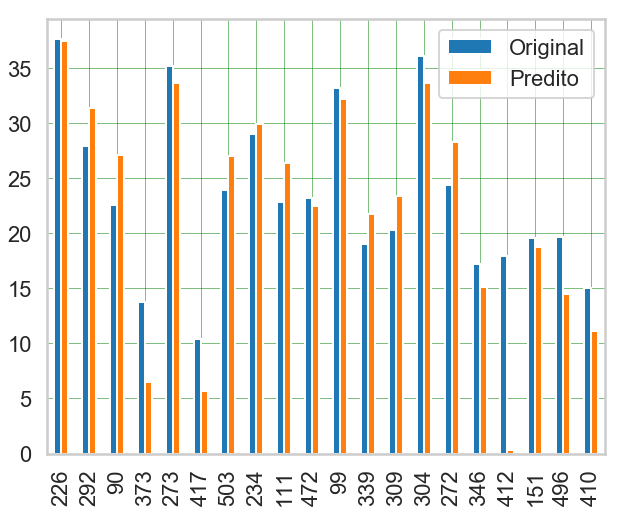

In [80]:
diff1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [81]:
diff.describe()

,Original,Predito
count,167.000000,167.000000
mean,22.523952,21.847663
std,9.711260,8.394229
min,7.000000,-6.249525
25%,16.400000,17.425063
50%,20.700000,21.725754
75%,25.050000,27.079831
max,50.000000,42.756775


In [82]:
print('Erro absoluto médio:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Erro quadrático médio:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Raiz quadrada do erro médio:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Erro absoluto médio: 3.4550349322483482
Erro quadrático médio: 28.530458765974583
Raiz quadrada do erro médio: 5.341391089030514


### Histograma da Variavel Resposta

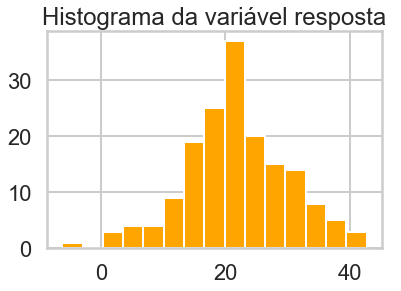

In [83]:
plt.hist(Y_pred, color='orange', bins=15)
plt.title('Histograma da variável resposta')
plt.show()

### R Quadrado

In [84]:
coefficient_of_dermination = r2_score(Y_test, Y_pred)
print("Coefiente de correlação: ", coefficient_of_dermination)

Coefiente de correlação:  0.6956551656111607


## ANOVA

In [121]:
d_melt = pd.melt(diff.reset_index(), id_vars=['index'], value_vars=['Predito', 'Original'])
d_melt.columns = ['index', 'treatments', 'value']
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table) 

                     sum_sq     df         F    PR(>F)
C(treatments)     38.190185    1.0  0.463553  0.496443
Residual       27352.095048  332.0       NaN       NaN


In [122]:
d_melt = pd.melt(bos.reset_index(), id_vars=['index'], value_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'])
d_melt.columns = ['index', 'treatments', 'value']
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD,FWER=0.05 
 group1  group2  meandiff   lower     upper   reject
----------------------------------------------------
  AGE      B     288.0991   277.05   299.1482  True 
  AGE     CHAS   -68.5057  -79.5548  -57.4566  True 
  AGE     CRIM   -64.9614  -76.0105  -53.9123  True 
  AGE     DIS    -64.7799  -75.829   -53.7308  True 
  AGE    INDUS   -57.4381  -68.4872  -46.389   True 
  AGE    LSTAT   -55.9218  -66.9709  -44.8727  True 
  AGE     NOX    -68.0202  -79.0693  -56.9711  True 
  AGE    PRICE   -46.0421  -57.0912  -34.993   True 
  AGE   PTRATIO  -50.1194  -61.1685  -39.0703  True 
  AGE     RAD    -59.0255  -70.0746  -47.9764  True 
  AGE      RM    -62.2903  -73.3394  -51.2412  True 
  AGE     TAX    339.6623  328.6132  350.7113  True 
  AGE      ZN    -57.2113  -68.2604  -46.1622  True 
   B      CHAS  -356.6049  -367.654 -345.5558  True 
   B      CRIM  -353.0605 -364.1096 -342.0114  True 
   B      DIS    -352.879 -363.9281 -341.8299 

In [ ]:
d_melt = pd.melt(diff.reset_index(), id_vars=['index'], value_vars=['Predito', 'Original'])
d_melt.columns = ['index', 'treatments', 'value']
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table) 